# A linear regression example
$ y = wx + b$ <br>
$w=3, \, b=10 $


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
# --------------------------------generate data-------------------------------------
x_in = np.linspace(0, 1, 100)
y_true = 3*x_in + 10 + np.random.rand(len(x_in))

plt.plot(x_in, y_true, 'b.')
plt.title('$ y = 3x + 10 + \epsilon$')
plt.show()




### $ (1)\; \hat y_i = wx_i + b $
### $ (2)\; MSE = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 $

## Three steps for training
1. Build the network
2. Compute the loss
3. Minimize the loss by using gradient descent

In [ ]:
# step 1
inputs = tf.placeholder(dtype=tf.float32, shape=[100], name='X')
y_label = tf.placeholder(dtype=tf.float32, shape=[100], name='label')

w1 = tf.Variable([0.5], dtype=tf.float32, name='weight')
b1 = tf.Variable([0.0], dtype=tf.float32, name='bias') 
y_pred = tf.add(tf.multiply(w1, inputs), b1, name='y_pred')  # y = w1*input + b1 --- (1)

# step 2
loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')  # loss is a scaler. --- (2)

# step 3
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()

![title](pics/ex3-1.PNG)

In [ ]:
y_pred

In [ ]:
pprint(tf.global_variables())

In [ ]:
## train the model
sess = tf.Session()
print("-----start training-----")
sess.run(init)

for step in np.arange(800):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%25 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0]))
               
y_out = sess.run(y_pred, feed_dict={inputs: x_in})

In [ ]:
plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

sess.close()

In [ ]:
# Linear by tensorflow


from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 500
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

#train_X = np.linspace(-1, 1, 200)
#train_Y = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2


n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

![title](pics/ex3-2.PNG)

# Practice
$ y = w_1x^2 + w_2x + b$ <br>
$ w_1=6, \, w_2=-4, \, b=1 $

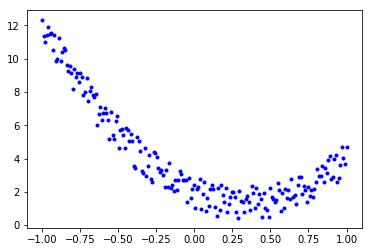

In [37]:
x_in = np.linspace(-1, 1, 200)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2

plt.plot(x_in, y_true, 'b.')
plt.show()

-----start training-----
step:   0, weight: 0.854, bias: 0.768
step: 1000, weight: 5.971, bias: 2.011


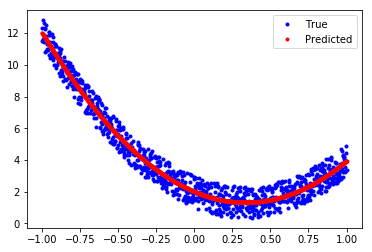

In [61]:
# Method-0 : Non-linear by tensorflow


x_in = np.linspace(-1, 1, 1000)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2

tf.reset_default_graph()
inputs = tf.placeholder(dtype=tf.float32, shape=[1000], name='X')
y_label = tf.placeholder(dtype=tf.float32, shape=[1000], name='label')
w1 = tf.Variable([0.5], dtype=tf.float32, name='weight')
w2 = tf.Variable([0.5], dtype=tf.float32, name='weight2')

b1 = tf.Variable([0.0], dtype=tf.float32, name='bias') 
y_pred = tf.add(
    tf.multiply(tf.square(inputs), w1),
    tf.add(tf.multiply(w2, inputs), b1, name='y_pred0')  # y = w1*input^2 + w2*input + b1 --- (1)
    , name='y_pred'
    )
# step 2
loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')  # loss is a scaler. --- (2)

# step 3
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()

## train the model
sess = tf.Session()
print("-----start training-----")
sess.run(init)

for step in np.arange(2000):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%1000 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0]))
               
y_out = sess.run(y_pred, feed_dict={inputs: x_in})

plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

sess.close()

In [42]:
x_in = x_in.reshape(200,1)
x_in.shape

(200, 1)

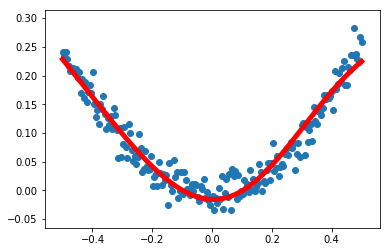

In [46]:
# Method-1 : Non-linear by tensorflow


import numpy as np

#create dataset
x_in = np.linspace(-1, 1, 200)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2


x_in = x_in.reshape(200,1)
y_true = y_true.reshape(200,1)

tf.reset_default_graph()
x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='x')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y')
graph = tf.get_default_graph()

#np.random.seed(0)
#a = np.random.random(size=1)
#print(a)


w = tf.Variable([0.5], dtype=tf.float32, name='weight')
b = tf.Variable([0], dtype=tf.float32, name='bias')



# Input layer 1 neuron
# Define the neural network middle layer
# Intermediate layer uses 10 neurons
# Output layer 1 neuron
Weight_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1

# Activation function tanh
L1 = tf.nn.tanh(Wx_plus_b_L1)

# Define the neural network output layer
Weight_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2

prediction = tf.nn.tanh(Wx_plus_b_L2)

# secondary cost function
loss = tf.reduce_mean(tf.square(y - prediction))

# Training using gradient descent
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)




#nonlin_model = tf.add(tf.multiply(tf.tanh(x), w), b)
#nonlin_loss = tf.reduce_mean(tf.pow(nonlin_model - y, 2), name='cost')


#y_pred = tf.add(tf.multiply(x, w), b, name='pred')
#loss = tf.reduce_mean(tf.square(y_pred - y), name='mse')

#optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#train_step_nonlin = tf.train.GradientDescentOptimizer(0.01).minimize(nonlin_loss)


#train_ops = optim.minimize(loss=loss)
#train_ops = optim.minimize(loss=nonlin_loss)
init = tf.global_variables_initializer()

#pprint(tf.global_variables())

sess = tf.Session()

sess.run(init)

for step in np.arange(500):
    sess.run(train_step, feed_dict={x: x_in, y: y_true})
    if step%100 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}'.format(step, sess.run(w)[0], sess.run(b)[0]))
        
        
y_out = sess.run(prediction, feed_dict={x: x_in})


plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

sess.close()

Populating the interactive namespace from numpy and matplotlib
Epoch 00118: early stopping


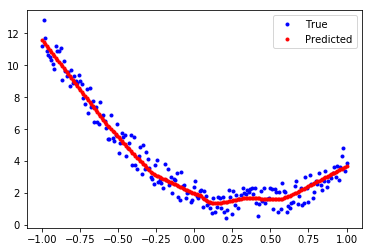

In [20]:
# Method-2 : Non-linear by Keras CNN


from numpy import loadtxt
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.python.keras.layers import Dropout, BatchNormalization, Flatten
from keras import regularizers
from tensorflow.keras.layers import Dense
from sklearn import preprocessing 
%pylab inline


# Create dataset
x_in = np.linspace(-1, 1, 200)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2
x_train, x_valid, y_train, y_valid = train_test_split(x_in, y_true, random_state = 7, test_size = 0.13)


# Training
model = tf.keras.Sequential()
model.add(Dense(200, activation="relu", input_shape=(1,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1))
batch_size = 32
epochs = 200
lr = 0.01
train_ratio = 0.9

early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)

model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =['mean_absolute_error'])

model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_valid, y_valid),
                          shuffle=False, callbacks=[early_stopping],
                          verbose=0
                         )

# Prediction
y_out = model.predict(x_in)


# Result
plt.plot(x_in, y_true, 'b.', label='True')
plt.plot(x_in, y_out, 'r.', label='Predicted')
plt.legend()
plt.show()

(500, 1)
Training data points: 334
Validation data points: 83
Testing data points: 83
Initialized
Minibatch loss at step 0: 4.783812
Minibatch RMSE: 3.093142
Validation RMSE: 2.956486


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:178: RuntimeWarning: divide by zero encountered in double_scalars


Minibatch loss at step 1000: 0.551357
Minibatch RMSE: 1.050143
Validation RMSE: 0.931740
Minibatch loss at step 2000: 0.549392
Minibatch RMSE: 1.048353
Validation RMSE: 0.929984
Minibatch loss at step 3000: 0.541598
Minibatch RMSE: 1.040940
Validation RMSE: 0.923409
Minibatch loss at step 4000: 0.376650
Minibatch RMSE: 0.867560
Validation RMSE: 0.799650
Minibatch loss at step 5000: 0.162582
Minibatch RMSE: 0.566818
Validation RMSE: 0.530540
Minibatch loss at step 6000: 0.090103
Minibatch RMSE: 0.416193
Validation RMSE: 0.375218
Minibatch loss at step 7000: 0.078140
Minibatch RMSE: 0.384690
Validation RMSE: 0.349137
Minibatch loss at step 8000: 0.067293
Minibatch RMSE: 0.353666
Validation RMSE: 0.327801
Minibatch loss at step 9000: 0.060094
Minibatch RMSE: 0.329930
Validation RMSE: 0.310891
Minibatch loss at step 10000: 0.055336
Minibatch RMSE: 0.312295
Validation RMSE: 0.302848
Test RMSE: 0.306194
Total RMSE: 0.306500
Execution time: 7.668912


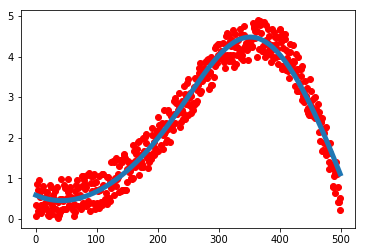

In [22]:
# Method-3 : Non-linear by tensorflow


import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import time


# Create dataset
n = 500
x = np.linspace(0,3.14,n)
x = np.array(x).astype(np.float32)
y = np.sin(x) * np.multiply(x, x)

#x_in = np.linspace(-1, 1, 500)
#y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2
#x = x_in
#y = y_true

r = np.random.random(n)
y = y + r
xNorm = (x - np.mean(x)) / (np.amax(x) - np.amin(x))




idxs = np.array(range(n)).astype(np.int32)
tmp = np.zeros((1, n), dtype=np.float32)
tmp[0] = xNorm
xNorm = tmp.T
print(xNorm.shape)

# Shuffle the indexes
np.random.shuffle(idxs)
# Assign 1/6th for validation, and test and the rest for training
nValidIdxs = int(n / 6)
nTestIdxs = int(n / 6)
validIdxs = idxs[0:nValidIdxs]
testIdxs = idxs[nValidIdxs:nValidIdxs + nTestIdxs]
nTrainIdxs = n - nValidIdxs - nTestIdxs
trainIdxs = idxs[nValidIdxs + nTestIdxs:n]
print('Training data points: %d' % nTrainIdxs)
print('Validation data points: %d' % nValidIdxs)
print('Testing data points: %d' % nTestIdxs)

# Split input and output values into the
# training, testing, and validation datasets.
trainX = xNorm[trainIdxs]
testX = xNorm[testIdxs]
validX = xNorm[validIdxs]

trainY = y[trainIdxs]
testY = y[testIdxs]
validY = y[validIdxs]

# This part defines a Neural Network with regularization
# applied to the loss term. SGD batch size is 128 samples.
# In addition, dropout is applied to the hidden layers during
# the training process.
batchSize = 256
nNodes = 128
stdDev = 0.1
regParam = 0.0001
initRate = 0.001
nLayers = 1

graph = tf.Graph()
tf.set_random_seed(1234)
with graph.as_default():
    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tfTrainX = tf.placeholder(tf.float32, shape=(batchSize, 1))
    tfTrainY = tf.placeholder(tf.float32, shape=(batchSize))
    tfValidX = tf.constant(validX)
    tfTestX = tf.constant(testX)
    tfAllX = tf.constant(xNorm)

    # This function defines a deep neural network
    # with 3 hidden layers and one output layer.
    def deepNeural(dataset):
        w = []
        b = []
        for i in range(nLayers):
            w.append(None)
            b.append(None)

        # Hidden layers
        for i in range(nLayers):
            if(i == 0):
                w[i] = tf.Variable(
                    tf.truncated_normal([1, nNodes], stddev=stdDev))
                logits = tf.matmul(dataset, w[i])
            else:
                w[i] = tf.Variable(
                    tf.truncated_normal([nNodes, nNodes], stddev=stdDev))
                logits = tf.matmul(logits, w[i])
            b[i] = tf.Variable(tf.zeros([nNodes]))
            logits = tf.add(logits, b[i])
            logits = tf.nn.tanh(logits)

        # Output layer
        wo = tf.ones([nNodes, 1], tf.float32)
        logits = tf.matmul(logits, wo)
        # Return the output layer
        return [logits, w, b, wo]

    # This function provides the logits from the output
    # layer calculated based upon the passed weights and
    # biases for the hidden and output layer calculated
    # based upon the loss minimization.
    def predict(dataset, w, b, wo):
        # Computation for hidden layers
        for i in range(nLayers):
            if(i == 0):
                logits = tf.matmul(dataset, w[i])
            else:
                logits = tf.matmul(logits, w[i])
            logits = tf.add(logits, b[i])
            logits = tf.nn.tanh(logits)
        # Computation for the output layer
        return tf.matmul(logits, wo)

    logits, w, b, wo = deepNeural(tfTrainX)
    loss = 0.5 * tf.reduce_mean(tf.square(tf.transpose(logits) - tfTrainY))
    # Compute regularization term
    regTerm = tf.Variable(0.0)
    for i in range(nLayers):
        regTerm = regTerm + tf.reduce_mean(tf.nn.l2_loss(w[i]))
    regTerm = regTerm * regParam
    # Add regularization term to loss
    loss = loss + regTerm

    # Optimizer.
    # Exponential decay of learning rate.
    globalStep = tf.Variable(0) # count the number of steps taken.
    learningRate = tf.train.exponential_decay(initRate, globalStep, 1000, 0.96, staircase=True)
    optimizer = tf.train.AdamOptimizer(learningRate).minimize(loss)

    # Predictions for the training, validation, and test data.
    trainPred = logits
    validPred = predict(tfValidX, w, b, wo)
    testPred = predict(tfTestX, w, b, wo)
    allPred = predict(tfAllX, w, b, wo)

def rmse(pred, actual):
    #print(pred.shape)
    pred = pred.reshape(1,-1)
    actual = actual.reshape(1,-1)
    return np.sqrt(((pred - actual)**2).mean())

# Run SGD for Neural Network with regularization
numSteps = 10001
startTime = time.time()
predY = np.array([])
validRMSEOld = 0.0
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(numSteps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batchSize) % (trainY.shape[0] - batchSize)
        # Generate a minibatch.
        batchX = trainX[offset:(offset + batchSize), :]
        batchY = trainY[offset:(offset + batchSize)]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feedDict = {tfTrainX : batchX, tfTrainY : batchY}
        _, l, pred = session.run(
            [optimizer, loss, trainPred], feed_dict=feedDict)
        if (step % 1000 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch RMSE: %f" % rmse(pred, batchY))
            validRMSE = rmse(validPred.eval(), validY)
            print("Validation RMSE: %f" % validRMSE)
            relChange = (validRMSEOld - validRMSE) / validRMSEOld
            if (abs(relChange) < 0.0001 or np.isnan(validRMSE)):
                break
            else:
                validRMSEOld = validRMSE
    print("Test RMSE: %f" % rmse(testPred.eval(), testY))
    print("Total RMSE: %f" % rmse(allPred.eval(), y))
    predY = allPred.eval()
print('Execution time: %f' % (time.time() - startTime))

plt.plot(y, 'ro')
plt.plot(predY, '-', lw=5)

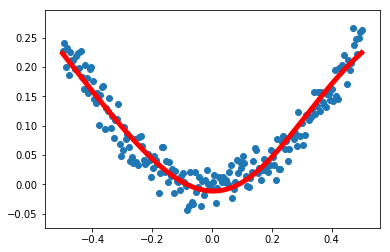

In [56]:
# Method-4 : Non-linear by tensorflow


import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt


# Create dataset
# Generate 200 random points using numpy
# linspace generates 200 points evenly distributed from -0.5 to 0.5
# [:,np.newaxis] is to transform one-dimensional data into two-dimensional data
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]

# Generate noise interference point noise
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise # simulation y =x**2



#x_in = np.linspace(-1, 1, 200)
#y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2
#x_data = x_in.reshape(200,1)
#y_data = y_true.reshape(200,1)

# define two placeholders
# placeholder dimension size is determined according to the input data size
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# Input layer 1 neuron
# Define the neural network middle layer
# Intermediate layer uses 10 neurons
# Output layer 1 neuron
Weight_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1

# Activation function tanh
L1 = tf.nn.tanh(Wx_plus_b_L1)

# Define the neural network output layer
Weight_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2

prediction = tf.nn.tanh(Wx_plus_b_L2)

# secondary cost function
loss = tf.reduce_mean(tf.square(y - prediction))

# Training using gradient descent
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    for step in range(2000):
                 sess.run(train_step, feed_dict={x: x_data, y: y_data}) #pass in sample value

    #Get predicted value
    prediction_value = sess.run(prediction, feed_dict={x: x_data})
 
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()